In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import pandas as pd

H1.1

In [2]:
coins = np.random.randint(2, size=(1000,10)) # Flip 1000 coins 10 times
numHeads = np.sum(coins,axis=1) # Heads are 1 and tails are 0, so counting ones will count number of heads
minIndex = np.argmin(numHeads) # Find the coin which had lowest occurence of heads.
randIndex = np.random.randint(1000)
C = np.array([coins[0], coins[randIndex], coins[minIndex]])
print("3 selected coins: \n", C)

3 selected coins: 
 [[1 1 0 0 0 0 0 0 1 0]
 [1 0 0 1 1 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]]


(a) What is the proability of heads for the 3 selected coins?

In [3]:
v = np.array([sum(C[0])/10, sum(C[1])/10, sum(C[2])/10])
mu = 0.5 # Probability of a coin flipping to heads is fixed and independent.
print("Fraction of heads: ", v)
print("Probability of heads : ", mu)

Fraction of heads:  [0.3 0.6 0. ]
Probability of heads :  0.5


(b) Repeat this entire experiment a large number of times(e.g. 100,000 run of the entire experiment) to get several instances of v1,vrand, and vmin and plot the historgrams of the distributions of v1,vrand, and vmin.

In [4]:
N = 100000
v = np.empty([N,3])

In [5]:
for i in range(N):
    coins = np.random.randint(2, size=(1000,10)) # Repetition of some thing but N times.
    numHeads = np.sum(coins,axis=1)
    minIndex = np.argmin(numHeads)
    randIndex = np.random.randint(1000)
    C = np.array([coins[0], coins[randIndex], coins[minIndex]])
    v[i,:] = np.array([sum(C[0])/10, sum(C[1])/10, sum(C[2])/10])

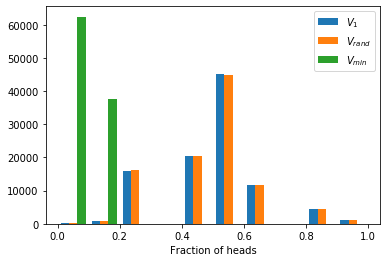

In [21]:
fig = plt.figure()
ax = plt.subplot(111)
ax.hist(v, label=['$V_1$', '$V_{rand}$', '$V_{min}$'])
ax.set_xlabel('Fraction of heads')
ax.legend()

  (c)

In [23]:
p = np.zeros([3,100])
eps = np.linspace(0.01, 1, 100)
for i in range(100):
    for j in range(N): # Counting when |v - mu| > eps for each v and eps.
        if(abs(v[j,0] - mu) > eps[i]):
            p[0,i] = p[0,i] + 1
        if(abs(v[j,1] - mu) > eps[i]):
            p[1,i] = p[1,i] + 1
        if(abs(v[j,2] - mu) > eps[i]):
            p[2,i] = p[2,i] + 1
p = p/N      

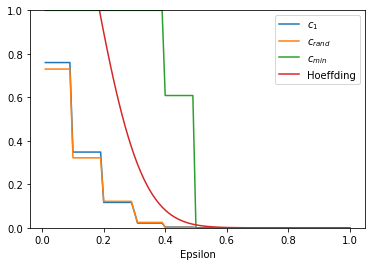

In [24]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(eps, p[0,:], label='$c_1$')
ax.plot(eps, p[1,:], label='$c_{rand}$')
ax.plot(eps, p[2,:], label='$c_{min}$')
y = 2*np.exp(-2*(eps**2)*10)
ax.plot(eps, y, label='Hoeffding')
ax.set_ylim(0,1)
ax.set_xlabel('Epsilon')
ax.legend()

(e)  
C<sub>min</sub> is not representative of an average coin and as a result does not obey Hoeffding bound. C<sub>1</sub> and C<sub>rand</sub> are overlapping and obey the bound.

H1.2  Posterior probability estimation for bin selection problem (curse of dimensionality).

(a)  Suppose we have ten bins (four labeled A, six labeled B). Each bin has balls with two colors(red and blue). The distribution of red and blue balls in bin A is (0.3, 0.7). The distributionof red and blue balls in bin B is (0.7, 0.3). We randomly select a bin and draw two balls withreplacement. That is, we select a bin, pick one ball, put it back, and pick another ball from thesamebin. Estimate the probability that we selected bin A given the selected balls are red andblue.

In [9]:
N = 10000
C = np.empty([N,3])
for i in range(N):
    label = np.random.choice(2,1,p=[0.4,0.6])
    # 0 is A. 1 is B.
    if(label == 0):
        A = np.random.choice(2,2,replace=True,p=[0.3, 0.7])
        C[i,:] = [A[0], A[1], label]
    else:
        B = np.random.choice(2,2,replace=True,p=[0.7, 0.3])
        C[i,:] = [B[0], B[1], label]
    # 0 is red. 1 is blue.

countA = 0
countB = 0
for i in range(N): # Finding ditribution of occurences.
    if((C[i,0] != C[i,1]) and (C[i,2] == 0)):
        countA = countA + 1
    elif((C[i,0] != C[i,1]) and (C[i,2] == 1)):
        countB = countB + 1
    else:
        pass
       
p = countA/(countB+countA)
print('P(A | red & blue) \u2245', p)

P(A | red & blue) ≅ 0.41538096368383576


(b)  Suppose we have ten bins (four labeled A, six labeled B). Each bin has balls with four colors(red, blue, white, black). The distribution of balls in bin A is (0.1, 0.3, 0.2, 0.4). The distribution of balls in bin B is (0.4, 0.2, 0.3, 0.1). We randomly select a bin and draw two balls with replacement. Estimate the probability that we selected bin A given the selected balls are red and blue.

In [10]:
N = 30000
C = np.empty([N,3])
for i in range(N):
    label = np.random.choice(2,1,p=[0.4,0.6])
    # 0 is A. 1 is B.
    if(label == 0):
        A = np.random.choice(4,2,replace=True,p=[0.1, 0.3, 0.2, 0.4])
        C[i,:] = [A[0], A[1], label]
    else:
        B = np.random.choice(4,2,replace=True,p=[0.4, 0.2, 0.3, 0.1])
        C[i,:] = [B[0], B[1], label]
    # 0 is red. 1 is blue. 2 is white. 3 is black.

countA = 0
countB = 0
for i in range(N): # [0, 1, 0] corresponds to red, blue, binA. Helps keep track which bins we pulled from.
    if((np.array_equal(C[i,:], [0, 1, 0])) or (np.array_equal(C[i,:], [1,0,0]))):
        countA = countA + 1
    elif((np.array_equal(C[i,:], [0, 1, 1])) or (np.array_equal(C[i,:], [1,0,1]))):
        countB = countB + 1
    else:
        pass
    
p = countA/(countB+countA)
print('P(A | red & blue) \u2245', p)

P(A | red & blue) ≅ 0.20810363836824697


H1.3 Let us consider the problem of nearest-mean classifier. Suppose we are givenNtraining samples(x1,y1),...,(xN,yN)from two classes withyn∈{+1,−1}. We saw in lecture 2 that we can decide alabel for a test vector x as g(x) =sign(w<sup>T</sup>x+b), where w= 2(μ<sub>+</sub>−μ<sub>−</sub>)and b=‖μ<sub>−</sub>‖<sup>2</sup><sub>2</sub>−‖μ<sub>+</sub>‖<sup>2</sup><sub>2</sub>.  μ<sub>+</sub> is a mean vector for samples in the +ve class and μ<sub>−</sub> is a mean vector for samples the −ve class.  Show that w<sup>T</sup>x+b≡∑<sup>N</sup><sub>n=1</sub>α<sub>n</sub>〈x<sub>n</sub>,x〉+ b and calculate the values of the α<sub>n</sub>.

〈x<sub>n</sub>,x〉= x<sub>n,1</sub>x<sub>1</sub> + ... + x<sub>n,n</sub>x<sub>n</sub>  
W<sup>T</sup>x = w<sub>1</sub>x<sub>1</sub> + ... + w<sub>n</sub>x<sub>n</sub>  
  
Thus if we can find α<sub>n</sub> for each vector of x such that w<sub>n</sub> = x<sub>n</sub>α<sub>n</sub>, the two equations are equal.  
  
Given w = 2(μ<sub>+</sub>−μ<sub>−</sub>) we can solve for α.  
α<sub>n</sub> = 2 , when x<sub>n</sub> belongs to the + ve class.  
α<sub>n</sub> = -2 , when x<sub>n</sub> belongs to the - ve class.

H1.4 (a) Implement a function that finds the K nearest neighbors of any given test digit, and classifies itaccording to a majority vote of their class labels. Construct a training set with 200 examples ofeach class (N= 600total examples). What is the empirical accuracy (fraction of data classifiedcorrectly) of 1-NN and 3-NN classifiers on the test examples from these classes?

In [11]:
mnist = fetch_openml('mnist_784', version=1, cache=False) #fetch_mldata is obsolete, this is the updated implementation
mnist.target = mnist.target.astype(np.int8) # Data is stored as string after fetching, so it is converted to a number.

In [12]:
def Euc_dist(x,y): # Calculates Euclidean Distance.
    d_2 = np.sum(np.add(x,-1*y)**2)
    d = (d_2)**(1/2)
    return d
    
def KNN(target, t_set, K): # K Nearest Neighbors. target what needs to be classified, t_set(training set)
    d = np.zeros((np.size(t_set.data,0),1))
    for i in range(np.size(t_set.data, 0)):
        d[i] = Euc_dist(target, t_set.data[i])
     
    # We need to find the K closest vectors to our target.
    if(K == 1):
        idx = np.argmin(d) 
        KNeighbors = t_set.label[idx]
    else:
        idx = np.argpartition(d, K, axis=0)
        KNeighbors = t_set.label[idx[:K]]
    
    x = np.unique(KNeighbors) 
    
    # The target belongs to the class that has the most elements in the K neighbors array.
    max_occurences = np.zeros(2)
    for i in range(np.size(x)):
        count = np.sum(KNeighbors == x[i])
        if(count > max_occurences[0]):
            max_occurences = np.array([count, x[i]])
    return max_occurences # Return (num of occurences, class)
        
        

In [13]:
# Training and test data is created using samples of 8,6, and 1.
loc_eight = np.argwhere(mnist.target == 8)
loc_six = np.argwhere(mnist.target == 6)
loc_one = np.argwhere(mnist.target == 1)
train_loc = np.array([loc_eight[:200], loc_six[:200], loc_one[:200]]).flatten()

test_loc = np.array([loc_eight[201:401], loc_six[201:401], loc_one[201:401]]).flatten()

class training_set:
    data = mnist.data[train_loc,:]
    label = mnist.target[train_loc]
    
class test_set:
    data = mnist.data[test_loc,:]
    label = mnist.target[test_loc]


In [14]:
p = 0
N = len(test_set.label)
for i in range(N): # Classification of all data in test_set
    result = KNN(test_set.data[i], training_set, 1)
    if(result[1] == test_set.label[i]): # Count how often it is correct.
        p = p + 1
p = p/N
print("Accuracy for 1-NN: ", p*100, "%")


Accuracy for 1-NN:  98.33333333333333 %


In [15]:
for i in range(N):
    result = KNN(test_set.data[i], training_set, 3)
    if(result[1] == test_set.label[i]):
        p = p + 1
p = p/N
print("Accuracy for 3-NN: ", p*100, "%")

Accuracy for 3-NN:  97.33055555555555 %


(b) Plot 5 test digits that are correctly classified by the 1-NN classifier, and 5 which are incorrectly classified. Do you see any patterns?

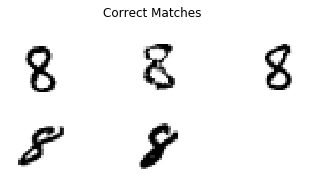

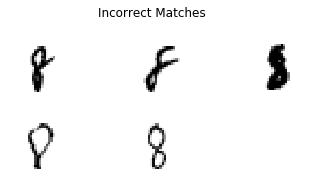

In [16]:
p = 0
N = len(test_set.label)
k = 0
j = 0
fig = plt.figure() # Figure for correct classification
fig2 = plt.figure() # Figure for incorrect classification
# Same code as before but modified to print 5 correct classifications and 5 incorrect ones.
for i in range(N):
    result = KNN(test_set.data[i], training_set, 1)
    if(result[1] == test_set.label[i]):
        p = p + 1
        if (k < 5):
            num = test_set.data[i]
            num_image = num.reshape(28,28)
            ax = fig.add_subplot(3,3,k+1)
            ax.imshow(num_image, cmap = mpl.cm.binary,
                        interpolation="nearest")
            ax.axis("off")
            k = k + 1
    else:
        if (j < 5):
            num = test_set.data[i]
            num_image = num.reshape(28,28)
            ax = fig2.add_subplot(3,3,j+1)
            ax.imshow(num_image, cmap = mpl.cm.binary,
                        interpolation="nearest")
            ax.axis("off")
            j = j + 1
fig.suptitle('Correct Matches')
fig2.suptitle('Incorrect Matches')
plt.show()

The images that were correctly classified are likely to have two clearly defined holes. Even more likely, is that they have a consistent line thickness. The images that were incorrectly classified had these features less often.

H1.5 Linear regression: Implement a solution for house price prediction using Python.  
(a) Let us first fit the price based on size because we expect to find some correlation between thetwo. We create two arrays: X (size) and Y (price).The data will be split into a training and testset. We will use the training data to find a best fit line and make predictions on the test data.

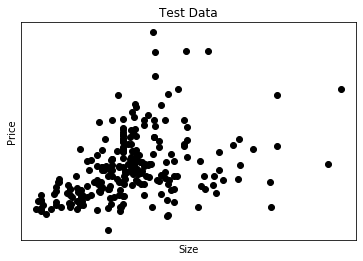

In [17]:
# Load CSV and columns
df = pd.read_csv("Housing.csv")
Y = df['price']
X = df['lotsize']
X = X.values# Split the data into training/testing sets
X_train = X[:-250]
X_test = X[-250:]# Split the targets into training/testing sets
Y_train = Y[:-250]
Y_test = Y[-250:]# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())
plt.show()

In [18]:
#ones = np.ones(1,1)
x = X_train.reshape(len(X_train), 1)
xt = x.T
X = xt*x
#Xinv = np.linalg.inv(X)
A = X*(np.linalg.inv(xt))
wb = np.linalg.solve(X, Y_train)
print(wb)

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
xt.shape